In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16, 'font.family': 'sans'})

In [2]:
df = pd.read_csv('../data/beer_reviews.csv')

In [3]:
beer_advocate_df = df.copy()

In [4]:
beer_advocate_df.sample(10)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
36445,807,George Bateman and Son Ltd. / Batemans Brewery,1155113398,4.0,4.0,4.0,BlackHaddock,English Pale Ale,4.0,4.5,Victory Ale,6.0,26012
848361,18858,Driftwood Brewery,1302106420,5.0,4.0,4.5,liamt07,Russian Imperial Stout,4.5,4.5,Singularity,11.8,65392
432394,1620,Dunedin Brewery,1277938446,4.5,3.5,4.5,jbone78,American Pale Ale (APA),4.0,4.0,Pipers Pale Ale,6.0,5559
62455,16866,The Bruery,1295493280,4.0,4.5,3.0,Halcyondays,American Wild Ale,3.0,4.0,Vitis Series: Pinotlambicus,8.4,63293
1557599,345,Victory Brewing Company,1266033885,3.0,4.5,5.0,Tilley4,Belgian IPA,3.0,3.0,Wild Devil,6.7,42546
801411,18149,The Lost Abbey,1216331568,5.0,4.5,4.5,BuckeyeNation,American Strong Ale,4.5,4.5,The Angel's Share - Brandy Barrel-Aged,12.0,42296
989146,284,Sapporo Breweries Ltd.,1130030485,2.5,2.0,2.0,becktone,Japanese Rice Lager,2.0,2.0,Sapporo Premium Beer,5.0,10071
1581967,429,Alaskan Brewing Co.,1253405408,4.0,3.5,3.5,ocelot2500,American IPA,3.5,3.0,Alaskan IPA,6.2,22787
264101,68,Flying Dog Brewery,1203463322,4.0,4.5,4.0,NJpadreFan,American Double / Imperial IPA,4.0,4.5,Double Dog Double Pale Ale,11.5,35754
750395,16524,Lobethal Bierhaus,1267082930,3.5,4.0,3.0,CrazyDavros,English Porter,3.0,3.5,Red Truck Porter,4.9,49455


In [5]:
print(beer_advocate_df.dtypes)

brewery_id              int64
brewery_name           object
review_time             int64
review_overall        float64
review_aroma          float64
review_appearance     float64
review_profilename     object
beer_style             object
review_palate         float64
review_taste          float64
beer_name              object
beer_abv              float64
beer_beerid             int64
dtype: object


In [6]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
brewery_id,1.00,0.22,-0.01,0.02,0.00,-0.00,-0.00,0.06,0.42
review_time,0.22,1.00,0.03,0.07,0.06,0.06,0.04,0.14,0.46
review_overall,-0.01,0.03,1.00,0.62,0.50,0.70,0.79,0.14,0.00
review_aroma,0.02,0.07,0.62,1.00,0.56,0.62,0.72,0.33,0.08
review_appearance,0.00,0.06,0.50,0.56,1.00,0.57,0.55,0.26,0.05
review_palate,-0.00,0.06,0.70,0.62,0.57,1.00,0.73,0.29,0.04
review_taste,-0.00,0.04,0.79,0.72,0.55,0.73,1.00,0.29,0.03
beer_abv,0.06,0.14,0.14,0.33,0.26,0.29,0.29,1.00,0.20
beer_beerid,0.42,0.46,0.00,0.08,0.05,0.04,0.03,0.20,1.00


In [7]:
# pd.plotting.scatter_matrix(df, alpha=0.2)

In [8]:
(beer_advocate_df.isnull().sum()).sum()

68148

In [9]:
for_violin = df[['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']]
for_violin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 6 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   review_overall     1586614 non-null  float64
 1   review_aroma       1586614 non-null  float64
 2   review_appearance  1586614 non-null  float64
 3   review_palate      1586614 non-null  float64
 4   review_taste       1586614 non-null  float64
 5   beer_abv           1518829 non-null  float64
dtypes: float64(6)
memory usage: 72.6 MB


In [10]:
corr2 = for_violin.corr()
corr2.style.background_gradient(cmap='coolwarm').set_precision(2)

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
review_overall,1.00,0.62,0.50,0.70,0.79,0.14
review_aroma,0.62,1.00,0.56,0.62,0.72,0.33
review_appearance,0.50,0.56,1.00,0.57,0.55,0.26
review_palate,0.70,0.62,0.57,1.00,0.73,0.29
review_taste,0.79,0.72,0.55,0.73,1.00,0.29
beer_abv,0.14,0.33,0.26,0.29,0.29,1.00


In [11]:
# pd.plotting.scatter_matrix(for_violin, alpha=0.2)

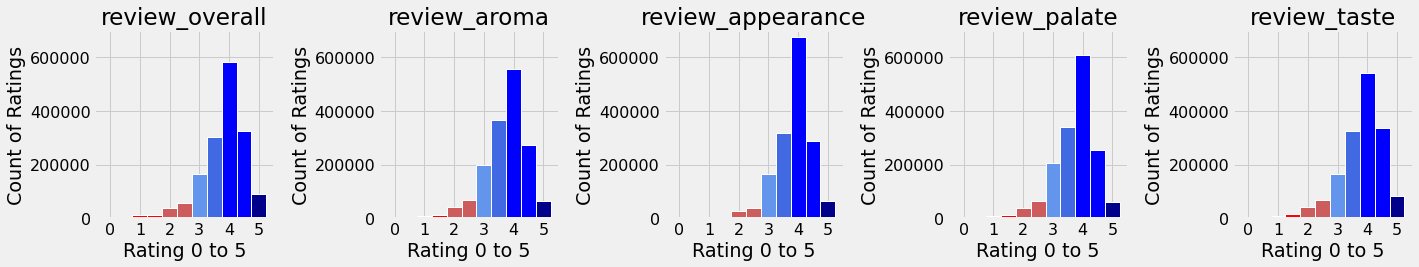

In [23]:
data = for_violin
fig, ax = plt.subplots(1,5, figsize=(20,4))

axex = ax.flatten()
for i in range(len(axex)):
    N, bins, patches = axex[i].hist(data.iloc[:, i], bins=[0, .5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5], align='left', edgecolor='white', linewidth=1)
    axex[i].set_title(data.columns[i])
    axex[i].set_ylabel('Count of Ratings')
    axex[i].set_xlabel('Rating 0 to 5')
    axex[i].set_ylim(0, 700000)
    axex[i].set_xticks([0, 1, 2, 3, 4, 5])
    colors=['darkred', 'darkred', 'red', 'red', 'indianred', 'indianred', 'cornflowerblue', 'royalblue', 'blue', 'blue', 'darkblue', 'darkblue']
    for j in range(len(patches)):
        patches[j].set_facecolor(colors[j])

fig.tight_layout()
plt.savefig('ratings_histogram.png', dpi = 300)
# axex[1].hist(data.iloc[:, 1])
# axex[2].hist(data.iloc[:, 2])
# axex[3].hist(data.iloc[:, 3])
# axex[4].hist(data.iloc[:, 4])
# axex[5].hist(data.iloc[:, 5])

## Notes / TODO
* Eliminate null brewery_name rows - Can't track location and other important aspects.
* Keep null review_profilename and beer_abv - Will not be focusing ont hese fetures so missing data is not important.
* review_time(int) to a pandas date_time

In [13]:
beer_advocate_df_1.describe()

NameError: name 'beer_advocate_df_1' is not defined

In [ ]:
beer_advocate_df_1.isnull().sum()

In [ ]:
beer_advocate_df_1.dropna(inplace=True)

In [ ]:
beer_advocate_df_1.isnull().sum()

In [ ]:
BA_state_df = beer_advocate_df_1.loc[:, ['brewery_id', 'brewery_name', 'review_overall']]

In [ ]:
BA_state_df.info()

In [ ]:
BA_state_df_agg = BA_state_df.groupby('brewery_name').agg({'brewery_id': [('brewery_id_most_common', lambda x: pd.Series.mode(x)[0]),
                                                        'count',
                                                        ('unique_brewery_ids', lambda x: len(set(x)))],
                                         'review_overall': [('Mean Rating' , lambda x:round(x.mean(), 2))]})

In [ ]:
BA_state_df_agg.reset_index(inplace=True)

In [ ]:
BA_state_df_agg

In [ ]:
BA_state_df_agg.info()

In [ ]:
BA_state_df_2 = BA_state_df.groupby('brewery_id').agg({'review_overall' : lambda x: round(x.mean(), 2), 'brewery_name' : lambda column: column.iloc[0], 'brewery_id' : [('review_count', 'count')]}).reset_index()

In [ ]:
BA_state_df_2.head(25)